In [81]:
# importing required packages 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [82]:
# to read the data

df = pd.read_csv('./diabetes.csv')

In [83]:
# to check the no of rows and columns

df.shape

(768, 9)

In [84]:
# to check balaced and unbalanced data
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [85]:
# to view the data

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [86]:
# to find the null value
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Data Describing & Visualization

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [88]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot: >

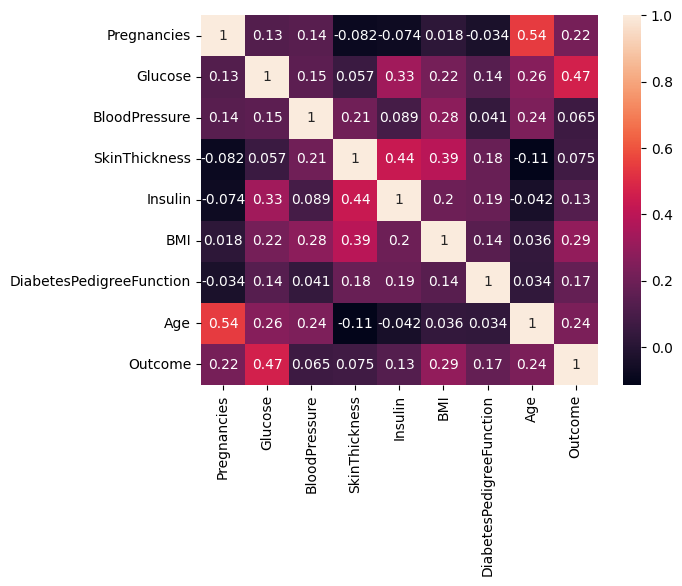

In [89]:
sns.heatmap(df.corr(),annot=True)

Text(0.5, 1.0, 'Diabetes Patient')

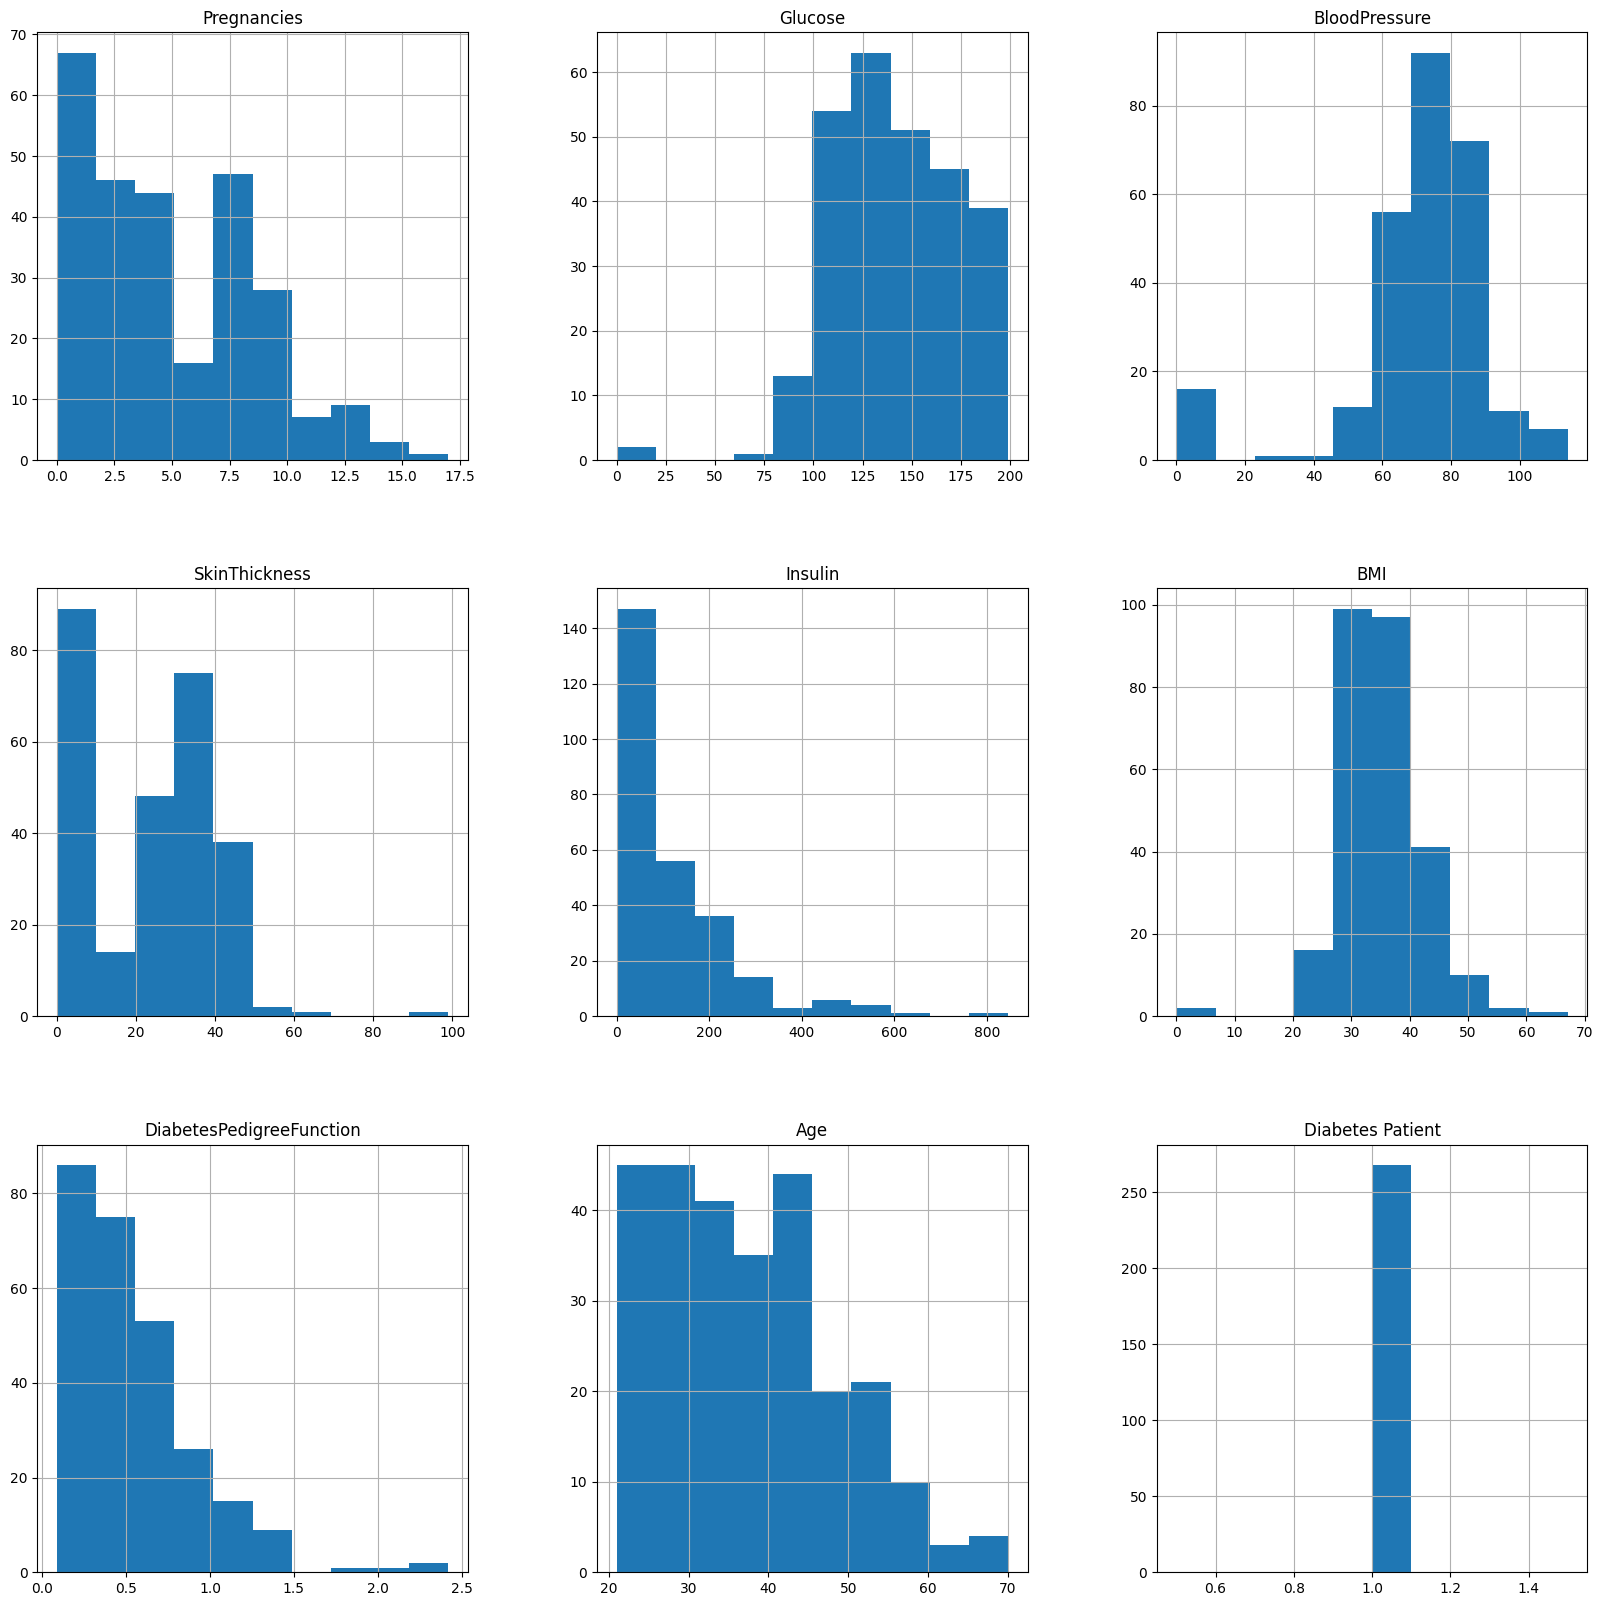

In [90]:
p = df[df['Outcome']==1].hist(figsize = (20,20))
plt.title('Diabetes Patient')

### NOTE:- 0 - Non-Diabitic Patient and 1 - Diabitic Patient

In [91]:
# choosing dependent and independent variables

X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [92]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [93]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

### Data Pre-Processing

In [94]:
# scaling (normalization and standardization)

sd = StandardScaler().fit(X)

X_stand = sd.transform(X)

In [95]:
# splitting the data

X_train, X_test, y_train, y_test = train_test_split(X_stand, y, 
test_size=0.3, random_state=42)

In [96]:
X_train.shape
y_train.shape

(537,)

In [97]:
knn = KNeighborsClassifier()

In [98]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [99]:
knn.score(X_train, y_train)

knn.predict

<bound method KNeighborsClassifier.predict of KNeighborsClassifier()>

In [100]:
score = []

for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    score.append(knn.score(X_train, y_train))

In [101]:
score

[1.0,
 0.8566108007448789,
 0.8584729981378026,
 0.8268156424581006,
 0.8230912476722533,
 0.8268156424581006,
 0.8119180633147114,
 0.8156424581005587,
 0.8119180633147114,
 0.7988826815642458,
 0.8044692737430168,
 0.7988826815642458,
 0.7970204841713222,
 0.7914338919925512,
 0.7951582867783985,
 0.7802607076350093,
 0.7858472998137802,
 0.7802607076350093,
 0.7895716945996276,
 0.7783985102420856]

In [102]:
k = list(range(1, 21))

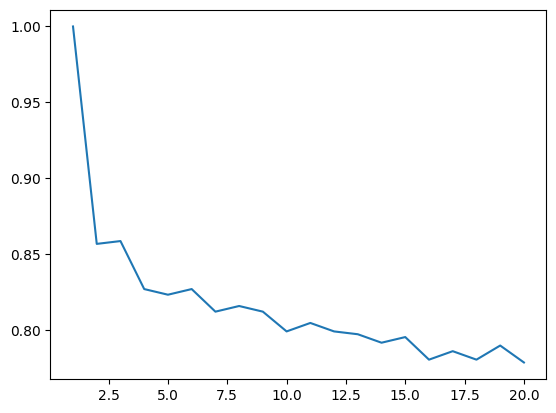

In [103]:
import matplotlib.pyplot as plt

plt.plot(k, score)
plt.show()

In [104]:
# hyperparameter tuning

grid_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto']
}

In [105]:
# creating grid search

gcv = GridSearchCV(KNeighborsClassifier(), grid_params, cv=5)
model = gcv.fit(X_train, y_train)

In [106]:
print(model.best_score_)
print(model.best_params_)

0.7765489788854275
{'algorithm': 'ball_tree', 'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'distance'}


In [107]:
knn = KNeighborsClassifier(algorithm='ball_tree', 
metric='minkowski', n_neighbors= 7, weights= 'distance'
)

In [108]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7, weights='distance')

In [109]:
y_trian_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

In [110]:
print("Training accuracy: ", accuracy_score(y_train, y_trian_predict))
print("Test accuracy: ", accuracy_score(y_test, y_test_predict))

Training accuracy:  1.0
Test accuracy:  0.70995670995671


In [111]:
from sklearn.metrics import classification_report

In [112]:
print(classification_report(y_train, y_trian_predict))
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       349
           1       1.00      1.00      1.00       188

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537

              precision    recall  f1-score   support

           0       0.77      0.80      0.78       151
           1       0.59      0.54      0.56        80

    accuracy                           0.71       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.70      0.71      0.71       231



[[121  30]
 [ 37  43]]


<AxesSubplot: >

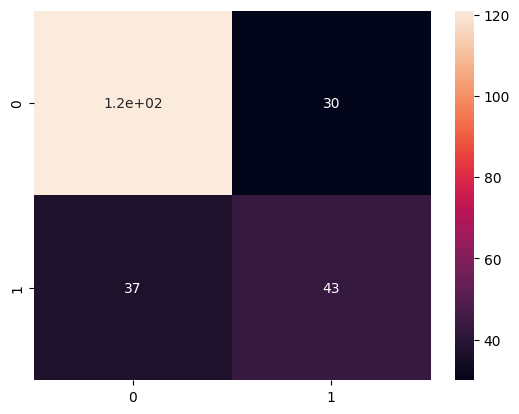

In [114]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_test_predict))
sns.heatmap(confusion_matrix(y_test,y_test_predict),annot=True)